/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


political_affiliation_Democratic t-SNE result shape: (630, 2)
political_affiliation_Republican t-SNE result shape: (780, 2)
political_affiliation_Swing t-SNE result shape: (90, 2)


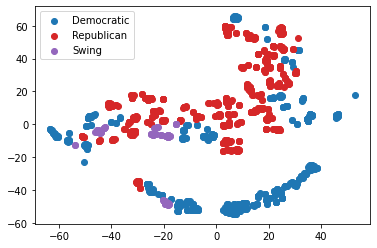

### States for each year

/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


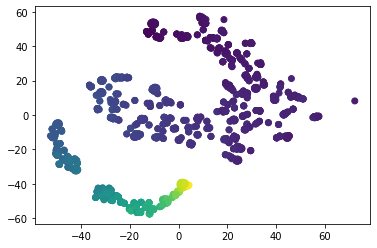

In [87]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Load the data into a pandas DataFrame
df = pd.read_excel('codes.xlsx')

# Group the data by state and year and aggregate the binary columns using max
grouped = df.groupby(['state', 'year']).max().reset_index()

# One-hot encode the state column
states_encoded = pd.get_dummies(grouped['state'])

# Concatenate the one-hot encoded columns with the original columns
df = pd.concat([grouped.drop(['state', 'year'], axis=1), states_encoded], axis=1)

# Calculate row sums to determine the number of 1's in each row
row_sums = df.iloc[:, 1:].sum(axis=1)

# Run t-SNE on the resulting matrix
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
tsne_result = tsne.fit_transform(df)

# Define a color map based on the number of 1's in each row
color_map = plt.get_cmap('viridis')(row_sums / row_sums.max())

# Visualize the resulting clusters using a scatter plot
fig, ax = plt.subplots()
ax.scatter(tsne_result[:, 0], tsne_result[:, 1], c=color_map)
plt.show()

### By State Combining All Years

/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


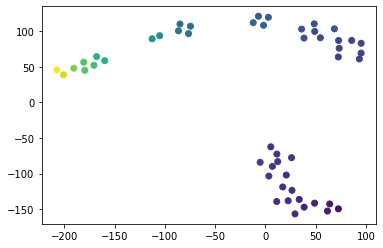

In [88]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Load the data into a pandas DataFrame
df = pd.read_excel('codes.xlsx')

# Group the data by state and aggregate the binary columns using max
grouped = df.groupby('state').max().reset_index()

# One-hot encode the state column
states_encoded = pd.get_dummies(grouped['state'])

# Concatenate the one-hot encoded columns with the original columns
df = pd.concat([grouped.drop(['state'], axis=1), states_encoded], axis=1)

# Calculate row sums to determine the number of 1's in each row
row_sums = df.drop(['year'], axis=1).sum(axis=1)

# Run t-SNE on the resulting matrix
tsne = TSNE(n_components=2, perplexity=5, random_state=0)
tsne_result = tsne.fit_transform(df)

# Define a color map based on the number of 1's in each row
color_map = plt.get_cmap('viridis')(row_sums / row_sums.max())

# Visualize the resulting clusters using a scatter plot
fig, ax = plt.subplots()
ax.scatter(tsne_result[:, 0], tsne_result[:, 1], c=color_map)
plt.show()


### States by Political Affiliation

/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


political_affiliation_Democratic t-SNE result shape: (630, 2)
political_affiliation_Republican t-SNE result shape: (780, 2)
political_affiliation_Swing t-SNE result shape: (90, 2)


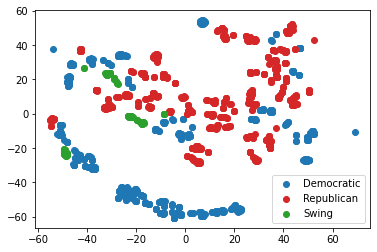

In [133]:
import pandas as pd
from sklearn.manifold import TSNE

# Load the data into a pandas DataFrame
df = pd.read_excel('codes.xlsx')

# Add a new column to map states to political affiliations
political_affiliations_map = {
    'Alabama': 'Republican',
    'Alaska': 'Republican',
    'Arizona': 'Republican',
    'Arkansas': 'Republican',
    'California': 'Democratic',
    'Colorado': 'Democratic',
    'Connecticut': 'Democratic',
    'Delaware': 'Democratic',
    'District of Columbia': 'Democratic',
    'Florida': 'Republican',
    'Georgia': 'Republican',
    'Hawaii': 'Democratic',
    'Idaho': 'Republican',
    'Illinois': 'Democratic',
    'Indiana': 'Republican',
    'Iowa': 'Republican',
    'Kansas': 'Republican',
    'Kentucky': 'Republican',
    'Louisiana': 'Republican',
    'Maine': 'Democratic',
    'Maryland': 'Democratic',
    'Massachusetts': 'Democratic',
    'Michigan': 'Democratic',
    'Minnesota': 'Democratic',
    'Mississippi': 'Republican',
    'Missouri': 'Republican',
    'Montana': 'Republican',
    'Nebraska': 'Republican',
    'Nevada': 'Democratic',
    'New Hampshire': 'Democratic',
    'New Jersey': 'Democratic',
    'New Mexico': 'Democratic',
    'New York': 'Democratic',
    'North Carolina': 'Republican',
    'North Dakota': 'Republican',
    'Ohio': 'Swing',
    'Oklahoma': 'Republican',
    'Oregon': 'Democratic',
    'Pennsylvania': 'Swing',
    'Rhode Island': 'Democratic',
    'South Carolina': 'Republican',
    'South Dakota': 'Republican',
    'Tennessee': 'Republican',
    'Texas': 'Republican',
    'Utah': 'Republican',
    'Vermont': 'Democratic',
    'Virginia': 'Democratic',
    'Washington': 'Democratic',
    'West Virginia': 'Republican',
    'Wisconsin': 'Swing',
    'Wyoming': 'Republican'
}
df['political_affiliation'] = df['state'].map(political_affiliations_map)

# Group the data by state and year and aggregate the binary columns using max
grouped = df.groupby(['state', 'year']).max().reset_index()

# One-hot encode the state and political affiliation columns
states = pd.get_dummies(grouped['state'])
political_affiliations_encoded = pd.get_dummies(grouped['political_affiliation'], prefix='political_affiliation')

# Drop the original state and political affiliation columns and concatenate the one-hot encoded columns
df = pd.concat([grouped.drop(['state', 'year', 'political_affiliation'], axis=1), states, political_affiliations_encoded], axis=1)

# Run t-SNE on the resulting matrix
tsne = TSNE(n_components=2, perplexity=25, random_state=0)

# n_iter, early_exaggeration, and learning_rate,
tsne_result = tsne.fit_transform(df)

import matplotlib.pyplot as plt

# Define a color map for the political affiliations
cmap = {'Republican': 'tab:red', 'Democratic': 'tab:blue', 'Swing': 'tab:green'}

# Visualize the resulting clusters using a scatter plot
fig, ax = plt.subplots()
for affiliation in political_affiliations_encoded.columns:
    indices = df.loc[:, affiliation] == 1
    tsne_result_affiliation = tsne_result[indices, :]
    print(f'{affiliation} t-SNE result shape: {tsne_result_affiliation.shape}')
    ax.scatter(tsne_result_affiliation[:, 0], tsne_result_affiliation[:, 1], c=cmap[affiliation.split('_')[-1]], label=affiliation.split('_')[-1])

# Annotate the plot with state names
# for i, state in enumerate(grouped['state'].unique()):
#     x, y = tsne_result[i, :]
#     ax.annotate(state, (x, y))

plt.legend()
plt.show()

political_affiliation_Democratic t-SNE result shape: (630, 2)
political_affiliation_Republican t-SNE result shape: (780, 2)
political_affiliation_Swing t-SNE result shape: (90, 2)


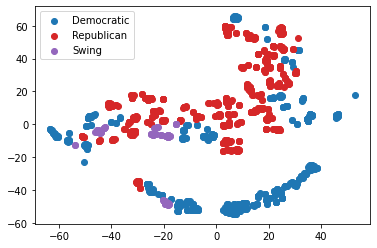

In [60]:
# import matplotlib.pyplot as plt

# # Define a color map for the political affiliations
# cmap = {'Republican': 'tab:red', 'Democratic': 'tab:blue', 'Swing': 'tab:purple'}

# # Visualize the resulting clusters using a scatter plot
# fig, ax = plt.subplots()
# for affiliation in political_affiliations_encoded.columns:
#     indices = df.loc[:, affiliation] == 1
#     tsne_result_affiliation = tsne_result[indices, :]
#     print(f'{affiliation} t-SNE result shape: {tsne_result_affiliation.shape}')
#     ax.scatter(tsne_result_affiliation[:, 0], tsne_result_affiliation[:, 1], c=cmap[affiliation.split('_')[-1]], label=affiliation.split('_')[-1])

# # Annotate the plot with state names
# # for i, state in enumerate(grouped['state'].unique()):
# #     x, y = tsne_result[i, :]
# #     ax.annotate(state, (x, y))

# plt.legend()
# plt.show()